# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

#### <font color='red'> As respostas devem ser fornecidas no Moodle. Usar o notebook para a implementação dos códigos que fornecerão as respostas</font>

---

In [21]:
# carregando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")
df.head()

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
0,Eugenio Ewell,M,1968,USA,Christian,New Orleans,Nurse,20.0
1,Ivo Izidro,M,1983,Mexico,Christian,Acapulco,Nurse,52.0
2,Lindsey Lever,M,1965,USA,Christian,New Orleans,Nurse,29.0
3,Desiree Dardar,F,1985,USA,Christian,New Orleans,Nurse,3.0
4,Mariann Mulero,NaN,1973,USA,Christian,New Orleans,Nurse,21.0


### Questão 1)

Considere a base de dados disponível em `TACTD-01-Base.csv`. Com relação aos dados faltantes no atributo 'Sex', i.e. linhas que não sejam 'F' nem 'M', podemos dizer que:
 
<font color='red'> (a) São do tipo completamente aleatório (MCAR)</font><br>
 (b) São do tipo (condicionalmente) aleatório (MAR)<br>
 (c) São do tipo não aleatório<br>
 (d) Não há dados faltantes<br> 

In [23]:
# seu código com análise do atributo Sex
print('Estatística descritiva:\n', df['Sex'].describe())
print('\nValores únicos:\n', df['Sex'].unique())
df[df['Sex'].isnull()]

Estatística descritiva:
 count     94
unique     2
top        F
freq      49
Name: Sex, dtype: object

Valores únicos:
 ['M' 'F' nan]


,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
4,Mariann Mulero,NaN,1973,USA,Christian,New Orleans,Nurse,21.0
5,Kathey Kleiman,NaN,1973,USA,Christian,New Orleans,Nurse,18.0
6,Rupert Rollison,NaN,1986,England,Christian,Birmingham,Nurse,5.0
7,Signe Seymore,NaN,1979,England,Christian,Birmingham,Nurse,8.0
12,Kraig Kriner,NaN,1972,Scotland,Christian,Edinburgh,Nurse,16.0
38,Archie Hogan,NaN,1976,Wales,Christian,Edinburgh,Nurse,19.0


In [24]:
df.query("Sex not in ['M', 'F']")

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
4,Mariann Mulero,NaN,1973,USA,Christian,New Orleans,Nurse,21.0
5,Kathey Kleiman,NaN,1973,USA,Christian,New Orleans,Nurse,18.0
6,Rupert Rollison,NaN,1986,England,Christian,Birmingham,Nurse,5.0
7,Signe Seymore,NaN,1979,England,Christian,Birmingham,Nurse,8.0
12,Kraig Kriner,NaN,1972,Scotland,Christian,Edinburgh,Nurse,16.0
38,Archie Hogan,NaN,1976,Wales,Christian,Edinburgh,Nurse,19.0


<font color='red'>Resp. (a) São do tipo completamente aleatório (MCAR).   
    Faltantes completamente aleatórios ou missing completely at random (MCAR):
a probabilidade de  𝑉𝑚  ser faltante é independente de  𝑉𝑚  e independente de qualquer outra observação  𝑋∈𝑉𝑐  no dataset;
Pode ser visto como o caso em que qualquer dado tem a mesma chance de estar faltando.<br>

---

### Questão 2)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Religion'. Esse atributo possui os seguintes problemas:

<font color='red'> (a) 9 dados faltantes (sendo desses 5 dados errôneos) e 1 outlier</font><br>
 (b) 4 dados faltantes devido a omissão do usuário<br>
 (c) 9 dados errôneos, sendo desses 2 outliers<br>
 (d) 1 outlier<br>

In [25]:
# seu código com análise dos dados no atributo Religion
print('Estatística descritiva:\n', df['Religion'].describe())
print('\nValores únicos:\n', df['Religion'].unique())
print('\nContagem dos valores NaN:\n', np.sum(df['Religion'].isnull()))
print('\nContagem dos valores únicos:\n', df['Religion'].value_counts())
df[df['Religion'] != 'Christian']

Estatística descritiva:
 count            96
unique            7
top       Christian
freq             90
Name: Religion, dtype: object

Valores únicos:
 ['Christian' 'd' nan '[' '----' '1' 'Ac%#' 'Buddhist']

Contagem dos valores NaN:
 4

Contagem dos valores únicos:
 Christian    90
----          1
d             1
[             1
Buddhist      1
1             1
Ac%#          1
Name: Religion, dtype: int64


,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
9,Leanne Lowy,F,1969,England,d,Birmingham,Nurse,22.0
18,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0
30,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0
39,Marlon Moore,M,1984,Australia,[,Brisbane,Nurse,4.0
47,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0
63,Alton Thornton,M,1984,Canada,----,Vancouver,Nurse,3.0
67,Marshall Vargas,M,1990,Scotland,1,Edinburgh,Nurse,NaN
71,Zachary Yates,M,2010,D3,Ac%#,_Dh,Nurse,16.0
72,Merle Clark,M,1985,Mexico,Buddhist,Acapulco,Nurse,3.0
92,Norah Carey,F,1961,Scotland,NaN,Edinburgh,Nurse,31.0


<font color='red'>Resp. (a) 9 dados faltantes (sendo desses 5 dados errôneos) e 1 outlier.   
    Buddhist pode ser considerado um outlier pois é uma religião. Os demais são dados faltantes sendo 4 NaN e 5 errôneos.<br>

---
### Questão 3)

Dados estruturados, quando comparados aos não-estruturados, são caracterizados por:

(a) permitir executar validação dos dados, mas não possibilitar acesso direto<br>
(b) possibilitar maior liberdade/flexibilidade na coleta dos dados, sendo ideais para coleta com baixo controle<br>
(c) armazenado em arquivos de formato texto livre, permitindo controle de versões<br>
<font color='red'>(d) possuir campos e atributos que permitam endereçar os dados diretamente</font><br>


Dados Estruturados:   
Dados cujos elementos são endereçáveis, facilitando armazenamento e recuperação, organizados em um repositório formatado.

Em contrapartida aos dados não-estruturados nos quais não há um esquema que mostre o atributo ou a informação que eu desejaria recuperar mas que não é disponível de forma direta.

Dados estruturados estão prontos para ser armazenados em bases de dados relacionais.   
Em dados estruturados podemos ainda definir relações com outros dados.   
A possibilidade de realizar validação e controle de entrada torna esses dados mais confiáveis.   
Finalmente, é possível projetar buscas para recuperar informação de forma eficiente!

Dados Não Estruturados:   
Símbolos organizados em documentos de vários formatos.   
Seu propósito é serem lidos e analisados por humanos dentro de um contexto cultural.   
Como humanos temos capacidades de compreender dados não estruturados pois podemos:   
    . interpretar mistura de símbolos e elementos   
    . detectar e corrigir erros   
    . preencher informacoes faltantes   
    . lidar com ambiguidade   
    . reconhecer e compreender humor e sentimentos por meio de elementos complexos   
Por isso são de difícil análise automática/computacional

Características de dados não estruturados:   
    . binários e/ou caracteres   
    . alta flexibilidade (não possuem esquema)   
    . coleta feita com baixo controle (in the wild)   
    . não verificados / não certificados   
    . possuem alta redundância   
    . possuem alta dimensionalidade

<font color='red'>Resp.(d) possuir campos e atributos que permitam endereçar os dados diretamente<br>

---

### Questão 4)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Years of experience' por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa.

O atributo possui:

(a) 3 outliers globais<br>
(b) 1 outlier, pois os outros dados são plausíveis<br>
<font color='red'>(c) 3 outliers globais, sendo dois desses também outliers contextuais</font><br>
(d) 3 outliers contextuais, sendo um deles também um outlier global<br>

Estatística descritiva:
 count    91.000000
mean     15.780220
std      10.725672
min       0.000000
25%       8.000000
50%      16.000000
75%      21.000000
max      52.000000
Name: Years of Experience, dtype: float64

Valores únicos:
 [20. 52. 29.  3. 21. 18.  5.  8. 46. 22.  4. 16. 28. 35. 45. 10. 19.  9.
 12. 23. 15. 13. 11. 32. 26. nan  1.  2.  0. 27.  7. 31. 17. 34.]

Contagem dos valores NaN:
 9

Contagem dos valores únicos:
 20.0    7
3.0     7
5.0     6
9.0     5
18.0    5
8.0     5
16.0    5
21.0    4
4.0     4
28.0    4
19.0    4
11.0    4
13.0    3
10.0    3
2.0     2
23.0    2
29.0    2
31.0    2
26.0    2
22.0    2
52.0    1
7.0     1
27.0    1
0.0     1
1.0     1
46.0    1
15.0    1
32.0    1
35.0    1
45.0    1
17.0    1
12.0    1
34.0    1
Name: Years of Experience, dtype: int64


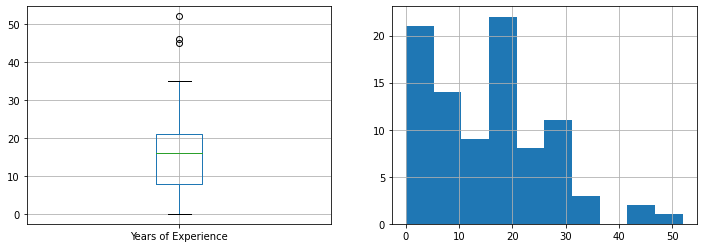

In [26]:
# seu código com análise do atributo Years of Experience
print('Estatística descritiva:\n', df['Years of Experience'].describe())
print('\nValores únicos:\n', df['Years of Experience'].unique())
print('\nContagem dos valores NaN:\n', np.sum(df['Years of Experience'].isnull()))
print('\nContagem dos valores únicos:\n', df['Years of Experience'].value_counts())
plt.figure(figsize=(12,4))
plt.subplot(121); df.boxplot('Years of Experience')
plt.subplot(122); df['Years of Experience'].hist()

In [27]:
df[df['Years of Experience'] > 40]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
1,Ivo Izidro,M,1983,Mexico,Christian,Acapulco,Nurse,52.0
8,Lora Lemoine,F,1976,England,Christian,Birmingham,Nurse,46.0
22,Ariel Almada,F,1950,Portugal,Christian,Lisbon,Nurse,45.0


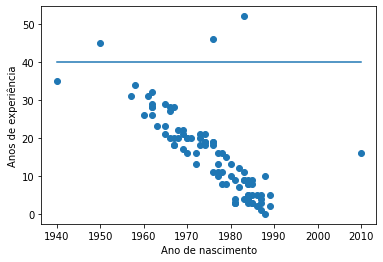

In [28]:
plt.scatter(df['Year of Birth'], df['Years of Experience'])
plt.xlabel('Ano de nascimento')
plt.ylabel('Anos de experiência')
plt.plot([1940, 2010], [40, 40])

<font color='red'>Resp.(c) 3 outliers globais, sendo dois desses também outliers contextuais.   
    Os 3 outliers globais podem ser vistos no boxplot.   
    2 desses têm datas de nascimento 1976 e 1983, sendo que em 2010 teriam a idade de 34 e 27 anos, portanto, contextualmente não poderiam ter os anos de experiência da base de dados.<br>

## Questão 5)

Gere o gráfico de caixa do atributo 'Year of Birth' e depois selecione e imprima na tela todas as linhas em que o atributo 'Year of Birth' possui valores fora das barras de mínimo e máximo do gráfico de caixa.

Como interpretar as linhas retornadas e quais ações são mais indicadas, em termos de manter ou remover os dados supeitos?

(a) a linha 15 e a linha 71 possuem outliers e dados errôneos, ambas devem ser removidas por completo.<br>
<font color='red'>(b) a linha 15 possui valores considerados outliers, mas são plausíveis e podem ser mantidos; a linha 71 possui outliers e dados errôneos e deve ser removida</font><br>
(c) a linha 22 possui outliers e atributos com dados errôneos, com valores que devem ser removidos; a linha 71 possui um outlier, mas é plausível e pode ser mantido<br>
(d) a linha 15 e a linha 71 possuem valores outliers, mas podem ser mantidos pois não há outros problemas que exijam limpeza<br>


Estatística descritiva:
 count     100.00000
mean     1976.20000
std        10.17424
min      1940.00000
25%      1969.00000
50%      1978.00000
75%      1984.00000
max      2010.00000
Name: Year of Birth, dtype: float64

Valores únicos:
 [1968 1983 1965 1985 1973 1986 1979 1976 1969 1981 1987 1972 1966 1940
 1977 1967 1989 1950 1970 1988 1974 1982 1978 1980 1984 1962 1960 1990
 1971 2010 1957 1961 1963 1958]

Contagem dos valores NaN:
 0

Contagem dos valores únicos:
 1984    9
1981    7
1987    6
1962    5
1976    5
1985    5
1983    5
1967    4
1974    4
1977    4
1982    3
1980    3
1965    3
1966    3
1969    3
1970    3
1973    3
1978    3
1972    2
1988    2
1986    2
1968    2
1989    2
1979    2
1950    1
1960    1
1958    1
1957    1
2010    1
1961    1
1963    1
1971    1
1990    1
1940    1
Name: Year of Birth, dtype: int64


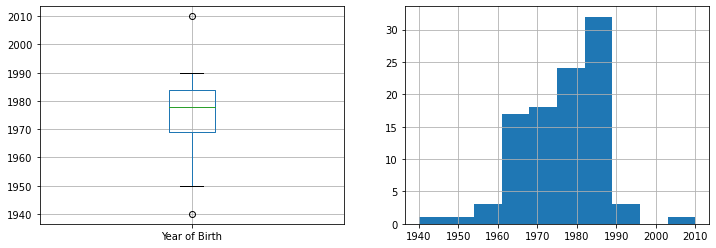

In [29]:
# seu código com análise do atributo "Year of Birth"
print('Estatística descritiva:\n', df['Year of Birth'].describe())
print('\nValores únicos:\n', df['Year of Birth'].unique())
print('\nContagem dos valores NaN:\n', np.sum(df['Year of Birth'].isnull()))
print('\nContagem dos valores únicos:\n', df['Year of Birth'].value_counts())
plt.figure(figsize=(12,4))
plt.subplot(121); df.boxplot('Year of Birth')
plt.subplot(122); df['Year of Birth'].hist()

In [35]:
# df[(df['Year of Birth'] < 1950) | (df['Year of Birth'] > 1990)]
df.query("not (1950 <= `Year of Birth` <= 1990)")
# O acento invertido < ` > permite escrever nomes de colunas que contem espaço no nome.

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
15,Vinicius Vitorio,M,1940,Brazil,Christian,São Paulo,Nurse,35.0
71,Zachary Yates,M,2010,D3,Ac%#,_Dh,Nurse,16.0


In [31]:
# Dados da linha 22
df.iloc[22,:]

Name                   Ariel Almada
Sex                               F
Year of Birth                  1950
Country of Birth           Portugal
Religion                  Christian
City                         Lisbon
Profession                    Nurse
Years of Experience              45
Name: 22, dtype: object

<font color='red'>Resp.(b) a linha 15 possui valores considerados outliers, mas são plausíveis e podem ser mantidos; a linha 71 possui outliers e dados errôneos e deve ser removida.<br>